In [1]:
def stream_diam(G):
    step = 0

    # At the beginning, R contains for each vertex v the number of nodes that can be reached from v in one step
    R={v:G.degree(v) for v in G.nodes()}
    done = False

    while not done:
        done = True
        for edge in G.edges():
            # At the i-th iteration, we change the value of R if there is at least one node that may be reached from v in i steps but not in i steps
            # I realize that this is the case, because I have a neighbor that in i-1 steps is able to visit a number of vertices different from how many I am able to visit
            if R[edge[0]] != R[edge[1]]:
                R[edge[0]] = max(R[edge[0]],R[edge[1]])
                R[edge[1]] = R[edge[0]]
                done = False
        step += 1

    return step

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import collections

class Analyzer:
    
    def __init__(self, network):
        self.network = network
        
    def get_degree_distribution(self):
        "Returns the plot of the degree distribution with a log-log scale"
        
        # if the network is directed, we consider the in-degree
        degree_sequence = nx.degree_histogram(self.network)
            
        degree_freq = {}
        for d in degree_sequence:
            if d in degree_freq:
                degree_freq[d] += 1
            else:
                degree_freq[d] = 1
                
        # Extract degrees and frequencies
        degrees = list(degree_freq.keys())
        frequencies = list(degree_freq.values())

        # Plotting in log-log scale
        plt.figure(figsize=(8, 6))
        plt.loglog(degrees, frequencies, marker='o', linestyle='None', color='b')
        plt.title('Log-log Degree Distribution')
        plt.xlabel('Degree (log scale)')
        plt.ylabel('Frequency (log scale)')
        plt.grid(True)

        return plt
    
    def get_clustering_coefficient(self):
        "Returns the average clustering coefficient of the network"
        return nx.average_clustering(self.network)
    
    def get_diameter(self):
        "Returns the diameter of the network"
        return stream_diam(self.network)

# Test Random Graph

In [3]:
import random

# generate undirected random graph
def randomG(n, p):
    G = nx.Graph()

    for i in range(n):
        G.add_node(i)
        for j in range (i+1,n):
            r=random.random()
            if r <= p:
                G.add_edge(i,j)

    return G

def random_directed_G(n, p):
    G = nx.DiGraph()

    for i in range(n):
        G.add_node(i)
        for j in range(i + 1, n):
            r = random.random()
            if r <= p:
                G.add_edge(i, j)

    return G

def configurationG(deg):
    G = nx.Graph()

    nodes=list(range(len(deg))) # It contains all nodes for which there is at least another neighbor to add

    # There may be some cases in which the procedure is unable to emulate the degree sequence in input:
    # (i) when the procedure leaves only one node whose degree does not match the required degree
    # (e.g., consider an input degree sequence deg=[3,1,1,1] and the procedure added edges (0,1) and (2,3));
    # (ii) when there is an edge between each pairs of nodes whose degree does not match the required degree
    # (e.g., consider an input degree sequence deg=[2,2,1,1] and the procedure added edges (0,1) and (2,3)).
    # In order to avoid the first case we stop to insert edges when there is a single node with a non-matching degree.
    # In order to avoid the second case, we stop to insert edges when the number of probes for a new edge to add
    # is above a given threshold (we below assume a threshold of n^2, but lower threshold can be set).
    # Note that, in both cases, the degree sequence of the resulting graph may not be exactly the same
    # as the one in input. However, few "outliers" do not alter the degree sequence distribution.
    threshold = len(nodes)**2
    while len(nodes) > 1:
        done = False
        tries = 1
        while not done:
            edge=random.sample(nodes, 2)
            if not G.has_edge(edge[0], edge[1]):
                done = True
                G.add_edge(edge[0], edge[1])
                deg[edge[0]] -=1
                if deg[edge[0]] == 0:
                    nodes.remove(edge[0])
                deg[edge[1]] -=1
                if deg[edge[1]] == 0:
                    nodes.remove(edge[1])
            else:
                tries +=1
                if tries > threshold:
                    done = True

    return G


In [4]:
nodes = 25000
edges = 23000065

total_possible_edges = nodes * (nodes - 1) / 2  # For undirected graph

probability = edges / total_possible_edges
print("The probability used to generate the graph is:", probability)


The probability used to generate the graph is: 0.07360315212608505


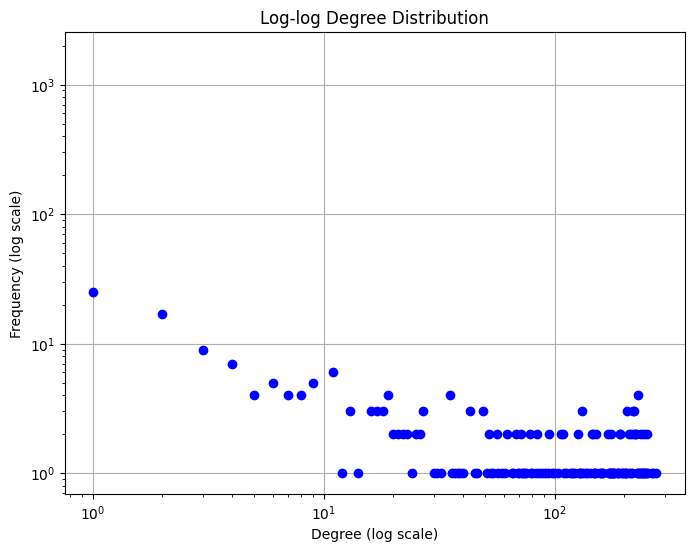

In [5]:
G = randomG(25000, 0.07360315212608505)
analyzer = Analyzer(G)
plt = analyzer.get_degree_distribution()
plt.show()

In [7]:
# print number of nodes and edges
print("Number of nodes:", G.number_of_nodes(), "\nNumber of edges:", G.number_of_edges())

# check if the diameter is ln n
print("Diameter:", analyzer.get_diameter())

Number of nodes: 25000 
Number of edges: 23001008
Diameter: 2


In [ ]:
import math
print("ln n:", math.log(G.number_of_nodes()))

In [ ]:
nodes = 25000
edges = 23000065

total_possible_edges_directed = nodes * (nodes - 1)  # For directed graph

probability_directed = edges / total_possible_edges_directed
print("The probability used to generate the directed graph is:", probability_directed)

In [ ]:
G = random_directed_G(25000, 0.036801576063042525)
analyzer = Analyzer(G)
plt = analyzer.get_degree_distribution()

In [ ]:
# print number of nodes and edges
print("Number of nodes:", G.number_of_nodes(), "\nNumber of edges:", G.number_of_edges())

# check if the clustering coefficient is low   
print("Clustering coefficient:", analyzer.get_clustering_coefficient()) 

# check if the diameter is ln n
print("Diameter:", analyzer.get_diameter())